In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import PowerTransformer
import pickle

from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [4]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.6 KB


In [6]:
df.shape

(1190, 12)

In [7]:
tot_col = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target']

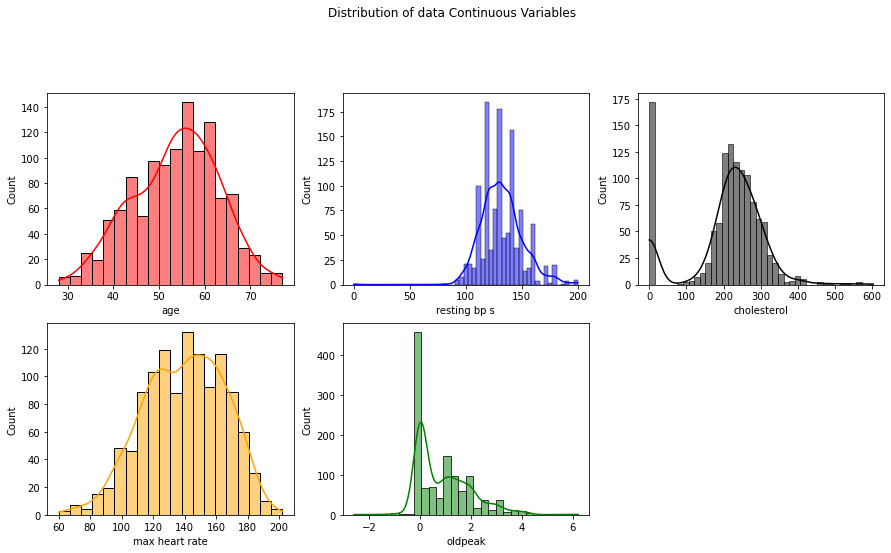

In [8]:
plt.figure(figsize=(15,12))

plt.suptitle("Distribution of data Continuous Variables")

colors = ['red', 'blue', 'black', 'orange', 'green', 'yellow']
continuous_variables = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
for i in range(5):
    plt.subplot(3,3,i+1)
    sns.histplot(df[continuous_variables[i]], color=colors[i], kde=True)
    plt.xlabel(continuous_variables[i])
plt.show()

In [9]:
categorical_variables = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'target']

C:\Users\Aryan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aryan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aryan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

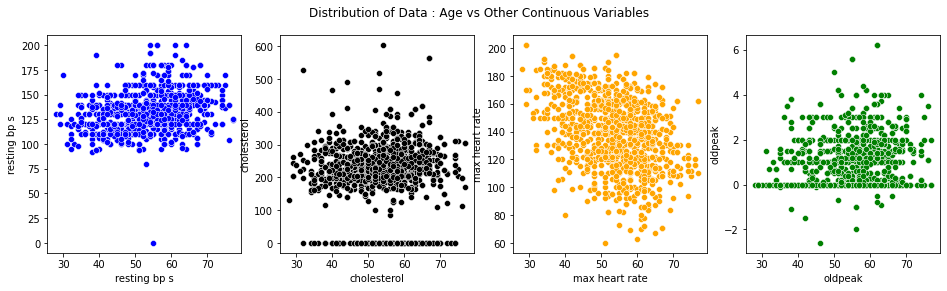

In [10]:
plt.figure(figsize=(16, 4))
plt.suptitle("Distribution of Data : Age vs Other Continuous Variables")
for i in range(1, len(continuous_variables)):
    plt.subplot(1,4,i)
    sns.scatterplot(df['age'] ,df[continuous_variables[i]], color=colors[i])
    plt.xlabel(continuous_variables[i])
plt.show()

C:\Users\Aryan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aryan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aryan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

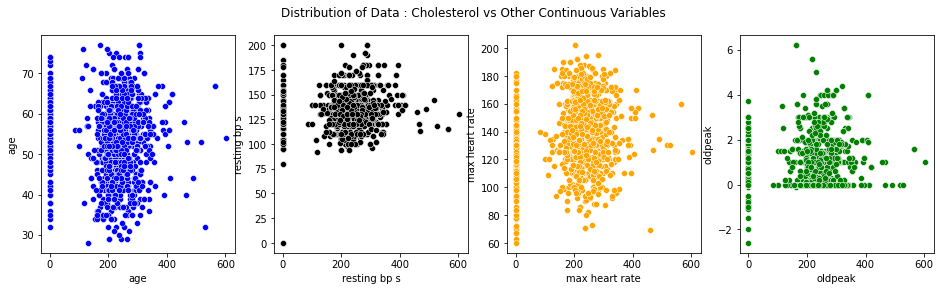

In [11]:
continuous_variables = ['chlolesterol', 'age', 'resting bp s', 'max heart rate', 'oldpeak']

plt.figure(figsize=(16, 4))
plt.suptitle("Distribution of Data : Cholesterol vs Other Continuous Variables")
for i in range(1, len(continuous_variables)):
    plt.subplot(1,4,i)
    sns.scatterplot(df['cholesterol'] ,df[continuous_variables[i]], color=colors[i])
    plt.xlabel(continuous_variables[i])
plt.show()

In [54]:
df_cho = df['cholesterol']
df_cho = pd.DataFrame(df_cho)
# df_cho

df_cho = df_cho.sort_values('cholesterol')
# df_cho

df_cho.reset_index(inplace=True)
df_cho = df['cholesterol']
df_cho = pd.DataFrame(df_cho)
# df_cho

,cholesterol
0,289
1,180
2,283
3,214
4,195
...,...
1185,264
1186,193
1187,131
1188,236


In [55]:
df_target = df['target']
df_target = pd.DataFrame(df_target)
# df_target

df_target = df_target.sort_values('target')
# df_target

df_target.reset_index(inplace=True)
df_target = df_target['target']
df_target = pd.DataFrame(df_target)
# df_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
1185,1
1186,1
1187,1
1188,1


In [56]:
df_target.value_counts()

target
1         629
0         561
dtype: int64

In [57]:
df_target_0 = df_target[:561]
df_target_1 = df_target[561:]

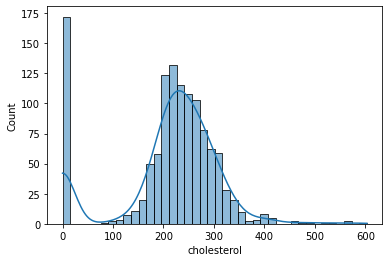

In [62]:
sns.histplot(df_cho['cholesterol'], kde=True)
df_
plt.show()

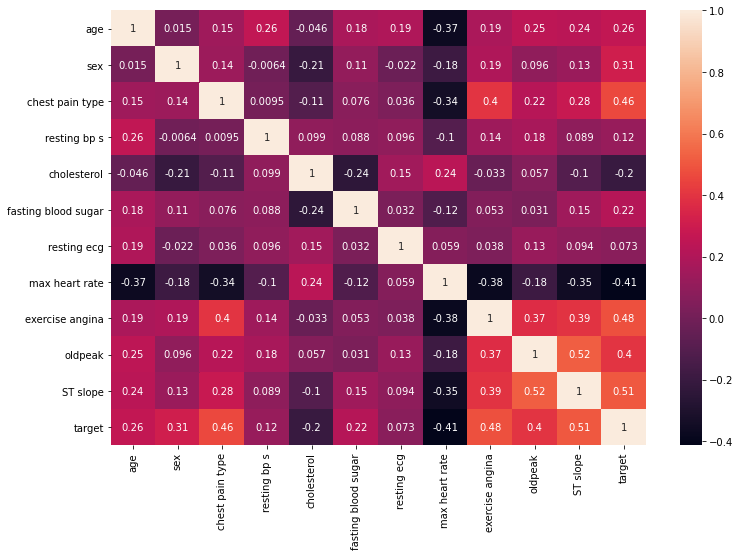

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [15]:
X = df[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']]
y = df['target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_test = pd.DataFrame(y_test)

dtc_pred = dtc.predict(X_test)

print("Train Acc :", dtc.score(X_train, y_train))
print("Test Acc :", dtc.score(X_test, y_test))
print("F1 score Test: ", f1_score(dtc_pred, y_test))

Train Acc : 1.0
Test Acc : 0.9117647058823529
F1 score Test:  0.9128630705394191


In [18]:
dtc.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [19]:
grid ={
    'max_depth':[i for i in range(1,30)],
    'criterion':['gini', 'entropy']
}

clf = GridSearchCV(dtc, grid)
clf.fit(X, y)
clf.best_params_

# print(grid)

{'criterion': 'entropy', 'max_depth': 18}

In [32]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=22)
dtc.fit(X_train, y_train)

y_test = pd.DataFrame(y_test)

dtc_pred = dtc.predict(X_test)

print("Train Acc :", dtc.score(X_train, y_train))
print("Test Acc :", dtc.score(X_test, y_test))
print("F1 score Test: ", f1_score(dtc_pred, y_test))

Train Acc : 1.0
Test Acc : 0.9243697478991597
F1 score Test:  0.9256198347107438


In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_test = pd.DataFrame(y_test)

rfc_pred = rfc.predict(X_test)

print("Train Accuracy: ",rfc.score(X_train, y_train))
print("Test Accuracy: ", rfc.score(X_test, y_test))
print("F1 score Test: ", f1_score(rfc_pred, y_test))

Train Accuracy:  1.0
Test Accuracy:  0.9453781512605042
F1 score Test:  0.9486166007905138


In [34]:
# import pickle

# # Saving model to disk
# pickle.dump(dtc, open('dtc_2.pkl','wb'))

# # Loading model to compare the results
# dtc_2 = pickle.load(open('dtc_2.pkl','rb'))

In [35]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_test = pd.DataFrame(y_test)

rfc_pred = rfc.predict(X_test)

print("Train Accuracy: ",rfc.score(X_train, y_train))
print("Test Accuracy: ", rfc.score(X_test, y_test))
print("F1 score Test: ", f1_score(rfc_pred, y_test))

Train Accuracy:  1.0
Test Accuracy:  0.9495798319327731
F1 score Test:  0.952755905511811


In [25]:
# import pickle

# # Saving model to disk
# pickle.dump(rfc, open('rfc_2.pkl','wb'))

# # Loading model to compare the results
# rfc_2 = pickle.load(open('rfc_2.pkl','rb'))